In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import findspark
findspark.init()

In [2]:
import pyspark
from pyspark.sql import SparkSession
#import the maximum - max function
from pyspark.sql.functions import max

# Echantillon de traitement sur les données de statistiques des retards

In [3]:
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

## Affichage de toutes les statistiques 

In [21]:
path_repositories = "hdfs://localhost:9000/esgi/data/projets/planes/airlines3.csv"
sdf = spark.read.format('csv').options(delimiter=",", header=True).load(path_repositories)
df = sdf.select("*").toPandas()
#df.groupBy("Airport.Code").count().show()
df

,Code aeroport,Nom aeroport,Nom complet aeroport,Date,Mois,Nom du mois,Annee,Retards transporteur,Nombre de retard du a l avion,Nombre de retard du a un probleme des systemes d aviations,...,Vols detournes,Statistics.Flights.Diverted,Vols a l heure,Nombre de vol,Minutes retard transporteur,Minutes de retard aviation,Minutes de retard du aux systemes d aviations,Nombre de minutes retards du a la securite,Nombre de minutes de retard au total,Nombre de minutes de retard du au temps
0,ATL,Atlanta,GA: Hartsfield-Jackson Atlanta International,2003/06,6,June,2003,1009,1275,3217,...,Delta Air Lines Inc.,Atlantic Southeast Airlines,AirTran Airways Corporation,America West Airlines Inc.,Northwest Airlines Inc.,ExpressJet Airlines Inc.,United Air Lines Inc.,US Airways Inc.,11,216
1,BOS,Boston,MA: Logan International,2003/06,6,June,2003,374,495,685,...,Atlantic Coast Airlines,Delta Air Lines Inc.,Atlantic Southeast Airlines,AirTran Airways Corporation,America West Airlines Inc.,American Eagle Airlines Inc.,Northwest Airlines Inc.,ExpressJet Airlines Inc.,ATA Airlines d/b/a ATA,United Air Lines Inc.
2,BWI,Baltimore,MD: Baltimore/Washington International Thurgo...,2003/06,6,June,2003,296,477,389,...,AirTran Airways Corporation,America West Airlines Inc.,American Eagle Airlines Inc.,Northwest Airlines Inc.,ExpressJet Airlines Inc.,United Air Lines Inc.,US Airways Inc.,Southwest Airlines Co.,11,29
3,CLT,Charlotte,NC: Charlotte Douglas International,2003/06,6,June,2003,300,472,735,...,Delta Air Lines Inc.,Atlantic Southeast Airlines,American Eagle Airlines Inc.,Northwest Airlines Inc.,ExpressJet Airlines Inc.,ATA Airlines d/b/a ATA,United Air Lines Inc.,US Airways Inc.,11,73
4,DCA,Washington,DC: Ronald Reagan Washington National,2003/06,6,June,2003,283,268,487,...,Atlantic Coast Airlines,Delta Air Lines Inc.,Atlantic Southeast Airlines,America West Airlines Inc.,American Eagle Airlines Inc.,Northwest Airlines Inc.,ExpressJet Airlines Inc.,ATA Airlines d/b/a ATA,United Air Lines Inc.,US Airways Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,San Diego,CA: San Diego International,2016/01,1,January,2016,280,397,171,...,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,Spirit Air Lines,SkyWest Airlines Inc.,United Air Lines Inc.,Virgin America,Southwest Airlines Co.,11,97
4404,SEA,Seattle,WA: Seattle/Tacoma International,2016/01,1,January,2016,357,513,351,...,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,SkyWest Airlines Inc.,United Air Lines Inc.,Virgin America,Southwest Airlines Co.,10,104,1274
4405,SFO,San Francisco,CA: San Francisco International,2016/01,1,January,2016,560,947,2194,...,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,SkyWest Airlines Inc.,United Air Lines Inc.,Virgin America,Southwest Airlines Co.,10,449,3825
4406,SLC,Salt Lake City,UT: Salt Lake City International,2016/01,1,January,2016,338,540,253,...,Delta Air Lines Inc.,Frontier Airlines Inc.,SkyWest Airlines Inc.,United Air Lines Inc.,Southwest Airlines Co.,8,84,1175,14,7426


## Affiche des codes d'aéroports

In [13]:
# Liste des codes
codes = df[['Code aeroport ']]
codes

,Code aeroport
0,ATL
1,BOS
2,BWI
3,CLT
4,DCA
...,...
4403,SAN
4404,SEA
4405,SFO
4406,SLC


In [18]:
# Colonne pour compter le nombre de répétion sur month
codes = df[['Nom du mois']]
codes = codes.groupby(by='Nom du mois').size().reset_index(name='count')
codes

,Nom du mois,count
0,April,348
1,August,377
2,December,377
3,Febuary,348
4,January,377
5,July,377
6,June,377
7,March,348
8,May,348
9,November,377


## Affichage du nombre de retard dû à l'avion pour chaque aéroport

In [23]:
#Nous affichons ici le nombre de retards pour chaque aéroport
codes = df[['Nom aeroport','Nombre de retard du a l avion']]
codes

,Nom aeroport,Nombre de retard du a l avion
0,Atlanta,1275
1,Boston,495
2,Baltimore,477
3,Charlotte,472
4,Washington,268
...,...,...
4403,San Diego,397
4404,Seattle,513
4405,San Francisco,947
4406,Salt Lake City,540


## Affichage d'un classement des aéroports avec le plus de retard -> du moins fiable au plus fiable


In [27]:
# Les aéroports avec le plus de retard
codes = df[['Code aeroport ','Nom aeroport','Nombre de retard du a l avion']]
codes = codes.astype({"Nombre de retard du a l avion":'int64'})
codes = codes.groupby(['Code aeroport ','Nom aeroport']).sum().sort_values(by=['Nombre de retard du a l avion'],\
ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
codes

,,Nombre de retard du a l avion
Code aeroport,Nom aeroport,
ORD,Chicago,315421
ATL,Atlanta,307206
DFW,Dallas/Fort Worth,260858
LAX,Los Angeles,189863
DEN,Denver,189656
LAS,Las Vegas,156536
IAH,Houston,142910
PHX,Phoenix,139684
SFO,San Francisco,133355


## Affichage sous forme graphique des 3 aéroports avec le plus de retard

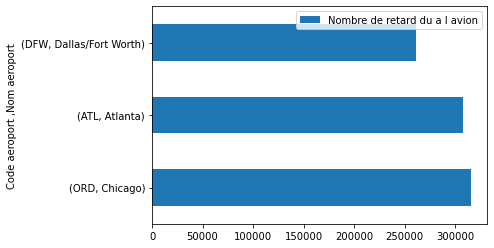

In [28]:
# Les 3 aéroports avec le plus de retard
codes = df[['Code aeroport ','Nom aeroport','Nombre de retard du a l avion']]
codes = codes.astype({"Nombre de retard du a l avion":'int64'})
codes = codes.groupby(['Code aeroport ','Nom aeroport']).sum().sort_values(by=['Nombre de retard du a l avion'],\
ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
codes.head(3).plot.barh();

## Affichage sous forme graphique des 3 aéroports avec le moins de retard

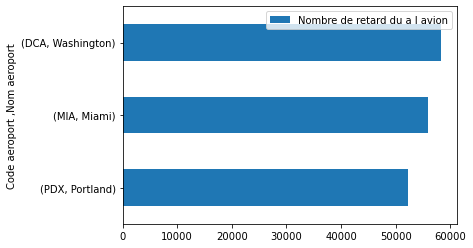

In [29]:
# Les 3 aéroports avec le moins de retard
codes = df[['Code aeroport ','Nom aeroport','Nombre de retard du a l avion']]
codes = codes.astype({"Nombre de retard du a l avion":'int64'})
codes = codes.groupby(['Code aeroport ','Nom aeroport']).sum().sort_values(by=['Nombre de retard du a l avion'],\
ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None).head(3)
codes.plot.barh();

# Aéroport le moins fiable 

In [33]:
# L'aéroport avec le plus de retard
codes = df[['Code aeroport ','Nom aeroport','Nombre de retard du a l avion']]
codes = codes.astype({"Nombre de retard du a l avion":'int64'})
codes = codes.groupby(['Airport.Code','Airport.Name']).sum().sort_values(by=['Statistics.# of Delays.Late Aircraft'],\
ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
codes.head(1)

,,Statistics.# of Delays.Late Aircraft
Airport.Code,Airport.Name,
ORD,Chicago,315421


## Nombre de retard par mois pour Atlanta en 2004

In [38]:
#affichage du nombre de retard pour ATL en 2004 
codes = df[['Code aeroport ','Nom aeroport','Nombre de retard du a l avion','Nom du mois']]
codes.loc[((df['Code aeroport ']=='ATL') & (df['Annee']=='2004'))]
#codes.plot.barh();

,Code aeroport,Nom aeroport,Nombre de retard du a l avion,Nom du mois
203,ATL,Atlanta,1265,January
232,ATL,Atlanta,1579,Febuary
261,ATL,Atlanta,912,March
290,ATL,Atlanta,924,April
319,ATL,Atlanta,1515,May
348,ATL,Atlanta,2070,June
377,ATL,Atlanta,1811,July
406,ATL,Atlanta,1443,August
435,ATL,Atlanta,944,September
464,ATL,Atlanta,1445,October


## Nombre de retard par mois pour Atlanta en 2004 version GRAPHIQUE

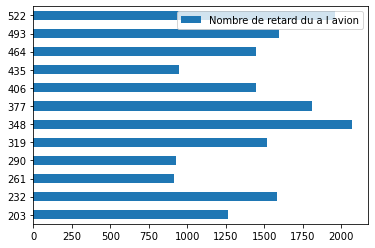

In [37]:
#affichage du nombre de retard pour ATL en 2004 
codes = df[['Code aeroport ','Nom aeroport','Nombre de retard du a l avion','Nom du mois']]
codes = codes.astype({"Nombre de retard du a l avion":'int64'})
codes.loc[((df['Code aeroport ']=='ATL') & (df['Annee']=='2004'))].plot.barh();
#codes.plot.barh();

## Retard d'un aéroport à séléctionner 

In [39]:
#Séléction de l'aéroport qu'on souhaite voir
codes = df[['Code aeroport ','Nom aeroport','Nombre de retard du a l avion','Annee']]
airport = input(print("Quel aéroport voulez-vous voir?"))
airport = airport.capitalize()
codes.loc[((df['Nom aeroport']==airport))]

Quel aéroport voulez-vous voir?
NoneAtlanta


,Code aeroport,Nom aeroport,Nombre de retard du a l avion,Annee
0,ATL,Atlanta,1275,2003
29,ATL,Atlanta,1791,2003
58,ATL,Atlanta,1766,2003
87,ATL,Atlanta,807,2003
116,ATL,Atlanta,906,2003
...,...,...,...,...
4263,ATL,Atlanta,1027,2015
4292,ATL,Atlanta,1034,2015
4321,ATL,Atlanta,1420,2015
4350,ATL,Atlanta,2176,2015


## Affichage des différents retards pour Atlanta en 2004 

In [40]:
#affichage du nombre de retard pour chaque raison
codes = df[['Code aeroport ','Nom aeroport','Nombre de retard du a l avion','Nombre de retard du a un probleme des systemes d aviations','Nombre de retard du a la securite','Nombre de retard du au temps','Nom du mois']]
codes.loc[((df['Code aeroport ']=='ATL') & (df['Annee']=='2004'))]

,Code aeroport,Nom aeroport,Nombre de retard du a l avion,Nombre de retard du a un probleme des systemes d aviations,Nombre de retard du a la securite,Nombre de retard du au temps,Nom du mois
203,ATL,Atlanta,1265,4567,15,599,January
232,ATL,Atlanta,1579,7959,13,787,Febuary
261,ATL,Atlanta,912,3195,7,227,March
290,ATL,Atlanta,924,3550,14,209,April
319,ATL,Atlanta,1515,5402,2,556,May
348,ATL,Atlanta,2070,7274,11,695,June
377,ATL,Atlanta,1811,5038,9,491,July
406,ATL,Atlanta,1443,4442,12,411,August
435,ATL,Atlanta,944,5019,15,362,September
464,ATL,Atlanta,1445,5822,11,500,October


## Classement des aéroports en fonction des retards dûs aux intempéries

In [41]:
codes = df[['Code aeroport ','Nom aeroport','Nombre de retard du au temps']]
codes = codes.astype({"Nombre de retard du au temps":'int64'})
codes = codes.groupby(['Code aeroport ','Nom aeroport']).sum().sort_values(by=['Nombre de retard du au temps'],\
ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
codes

,,Nombre de retard du au temps
Code aeroport,Nom aeroport,
PDX,Portland,2791
SAN,San Diego,5056
FLL,Fort Lauderdale,5084
TPA,Tampa,5092
IAD,Washington,5849
SEA,Seattle,5953
MIA,Miami,7487
CLT,Charlotte,7738
MCO,Orlando,8124


## Affichage des mois ou le nombre de retards a été inferieur ou égal à 1000

In [42]:
codes = df[['Code aeroport ','Nom aeroport','Nombre de retard du a l avion','Nom du mois']]
select = input(print("Merci de séléctionner l'année :"))
select = select.capitalize()
codes = codes.astype({"Nombre de retard du a l avion":'int64'})
codes.loc[((df['Code aeroport ']=='ATL') & (df['Annee']==select) & (codes['Nombre de retard du a l avion'] <= 1000))]

Merci de séléctionner l'année :
None2004


,Code aeroport,Nom aeroport,Nombre de retard du a l avion,Nom du mois
261,ATL,Atlanta,912,March
290,ATL,Atlanta,924,April
435,ATL,Atlanta,944,September


## Affichage des mois ou le nombre de retards a été supérieur à 1000

In [43]:
codes = df[['Code aeroport ','Nom aeroport','Nombre de retard du a l avion','Nom du mois']]
select = input(print("Merci de séléctionner l'année :"))
select = select.capitalize()
codes = codes.astype({"Nombre de retard du a l avion":'int64'})
codes.loc[((df['Code aeroport ']=='ATL') & (df['Annee']==select) & (codes['Nombre de retard du a l avion'] > 1000))]

Merci de séléctionner l'année :
None2004


,Code aeroport,Nom aeroport,Nombre de retard du a l avion,Nom du mois
203,ATL,Atlanta,1265,January
232,ATL,Atlanta,1579,Febuary
319,ATL,Atlanta,1515,May
348,ATL,Atlanta,2070,June
377,ATL,Atlanta,1811,July
406,ATL,Atlanta,1443,August
464,ATL,Atlanta,1445,October
493,ATL,Atlanta,1596,November
522,ATL,Atlanta,1961,December
